# Black-Scholes

Supongamos la hipótesis de mercados eficientes, es decir, que:

 - Toda la información del activo está reflejada en el precio actual.
 - Los mercados responden inmediatamente a cualquier información nueva acerca de un activo.

Modelar el precio de un activo es modelar la llegada de nueva información que afecta el precio. Por los dos ítems anteriores y pensando el precio del activo como un proceso estocástico, se trata de un proceso de Markov.

Podemos notar que el cambio absoluto en el precio del activo no es lo que realmente interesa, sino el cambio sobre el precio original, es decir, el retorno
$$ R=\frac{S_t-S}{S}.$$

Si $S$ es el precio del activo a tiempo $t$, y consideramos un tiempo posterior $t+dt$, en el cual $S$ cambia a $S+dS$ (donde $d$ indica un cambio pequeño), el retorno sería $\frac{dS}{S}$. El modelo más común para modelar este retorno lo descompone en dos partes.

Una parte, es un predecible y determinista retorno similar al retorno libre de riesgo y lo planteamos como
$$\mu dt,$$
donde $\mu$ es una medida del cambio de crecimiento promedio del precio del activo. En modelos sencillos se toma $\mu$ constante pero en otros puede ser función de $S$ y $t$.

La otra parte modela la aleatoriedad en el cambio del precio $S$ en respuesta a los efectos externos, como por ejemplo noticias inesperadas. Se representa un muestre aleatorio sacado (en general) de una distribución normal con media 0 y agrega al retorno el término
$$\sigma dX,$$
donde $\sigma$ es la llamada **volatilidad**, que mide la desviación estándar de los retornos. La cantidad $dX$ es un movimiento browniano.

Juntando los dos términos, obtenemos la **ecuación diferencial estocástica**
$$\frac{dS}{S}=\mu dt+\sigma dX.$$

Notar que si no tuvieramos volatilidad, digamos $\sigma=0$, entonces
$$\frac{dS}{S}=\mu dt \Rightarrow \frac{dS}{dt}=\mu S,$$
que da como resultado el crecimiento exponencial en el valor del activo:
$$S=S_0e^{\mu(t-t_0)},$$
con $t_0$ el tiempo inicial, y $S_0$ el precio inicial. Es decir, cuando $\sigma=0$, el precio es totalmente determinista y se puede predecir el precio futuro con certeza, teniendo en cuenta la hipótesis de no arbitraje (DONDE SE USA ESTO?)

## Análisis de $dX$

$dX$ es un paseo al azar que podemos suponer 
$$X_{k+1}=X_k\pm\Phi(dt),\ X_0=0.$$
Por lo cual, para alguna $\Phi(dt)$,
$$dX_k=\pm\Phi(dt).$$
Cuya esperanza y varianza es
$$E(dX_k)=0, \ Var(dX_k)=\Phi(dt)^2.$$
Además sabemos que $E(X(T))=0$ y la varianza
$$Var(X(T))=\sum_{j=0}^{n-1}Var(dX_k)=\sum_{j=0}^{n-1}\Phi(dt)^2=\sum_{j=0}^{n-1}\frac{\Phi(dt)^2}{dt}dt.$$
Ahora:

 - Si $\frac{\Phi(dt)^2}{dt}\to 0$, entonces $Var(X(T))=0$ y no sería estocástico, sería determinístico.
 - Si $\frac{\Phi(dt)^2}{dt}\to +\infty$, entonces $Var(X(T))=+\infty$ y tampoco es un caso interesante.
 
Es razonable pedir entonces que $\frac{\Phi(dt)^2}{dt}\to C>0$, o, equivalentemente:
$$\frac{\Phi(dt)}{\sqrt{dt}}\to \sqrt{C}>0.$$
Con lo cual, la $\Phi(dt)$ es del orden $\sqrt{dt}$.

Otra forma de escribir $dX$ es
$$dX=\phi\sqrt{dt},$$
donde $\phi\sim\mathcal{N}(0,1)$.

## Integrales estocásticas

Ya vimos que si $dS=\mu S dt$ entonces $S=S_0e^{\mu(t-t_0)}$. Analicemos
$$dS=S\sigma dX$$

Dados un movimiento browniano $Z(t)$ y dada $F(t,Z(t))=F(Z)$, es decir, una función que sólo depende del movimiento browniano, entonces
$$\int_0^TF'(Z)dZ=F(Z(T))-F(Z(0))-\frac{1}{2}\int_0^TF''(Z)dt.$$

Recordemos el **Lema de Ito**. Supongamos que $S$ está dada por
$$dS=S\mu dt+S\sigma dZ,$$
donde $Z$ es un movimiento Browniano. Sea ahora $V(S,t)$ suave (continua y con $\frac{\partial V}{\partial t}, \frac{\partial V}{\partial S}, \frac{\partial^2 V}{\partial S^2}$ existan y sean continuas). Entonces
$$dV=\left(\sigma S \frac{\partial V}{\partial S}\right)dZ+\left(\frac{\partial V}{\partial t}+\mu S\frac{\partial V}{\partial S}+\frac{1}{2}\sigma^2S^2\frac{\partial^2 V}{\partial S^2}\right)dt.$$

Si tomamos $V(S,t)=\ln(S)$, entonces
$$\frac{\partial V}{\partial S}=\frac{1}{S},\ \frac{\partial^2 V}{\partial S^2}=-\frac{1}{S^2},\ \frac{\partial V}{\partial t}=0.$$
Aplicando el lema anterior:

\begin{align*}
    dV&=S\sigma\frac{1}{S}dZ+\left(0+\mu S\frac{1}{S}-\frac{1}{2}\sigma^2S^2\frac{1}{S^2}\right)dt\\
    &=\sigma dZ+\left(\mu-\frac{1}{2}\sigma^2\right)dt.
\end{align*}

Además, por cómo es $V$
$$dV=\ln(S_{t+dt})-\ln(S_t)=\ln\left(\frac{S_{t+dt}}{S_t}\right).$$

Con lo cual
$$\ln\left(\frac{S_{t+dt}}{S_t}\right)=\sigma dZ+\left(\mu-\frac{1}{2}\sigma^2\right)dt.$$

Lo que dice que el incremento del logaritmo se comporta normalmente:
$$\ln\left(\frac{S_{t+dt}}{S_t}\right)\sim\mathcal{N}\left(\left(\mu-\frac{1}{2}\sigma^2\right)dt,\sigma \sqrt{dt}\right).$$

Con lo cual,
$$S_{t+dt}=S_te^{\left(\mu-\frac{1}{2}\sigma^2\right)dt+\sigma dZ}=S_0e^{\left(\mu-\frac{1}{2}\sigma^2\right)dt+\sigma dZ}.$$

O, si pensamos pasos discretos, podemos escribirlo desde el momento inicial:
$$S_k=S_0\prod_i^ke^{\mu-\frac{1}{2}\sigma^2+\sigma b_i}, \ k=1,\dots,N.$$

$$S_k=S_0e^{\left(\mu-\frac{1}{2}\sigma^2\right)k+\sigma \sum_i^kb_i}=S_0e^{\left(\mu-\frac{1}{2}\sigma^2\right)t_k+\sigma W_k},$$
para $t_k=k$, $W_k=\sum_i b_i$ y $b_i$ shocks aleatorios provenientes de $Z$.

En algunas bibliografías se conoce como **drift_{t+dt}** y **difussion_{t+dt}** a
$$S_{t+dt}=S_te^{drift_{t+dt}+difussion_{t+dt}}.$$

Con lo cual, en estos casos sería
$$drift_{t+dt}=\mu-\frac{1}{2}\sigma^2, \ difussion_{t+dt}=\sigma dZ.$$

En otras biblios, se llama **drift** a $\mu$ y **difussion** a $\sigma$.

### Simulación

Cargamos las librerías.

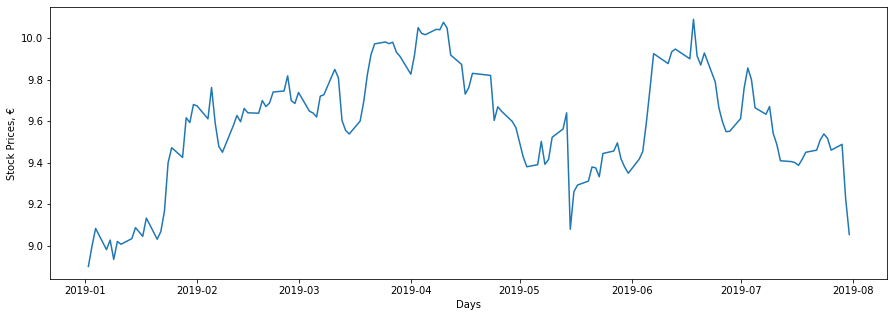

In [1]:
# basado en https://towardsdatascience.com/simulating-stock-prices-in-python-using-geometric-brownian-motion-8dfd6e8c6b18
import pandas as pd
import numpy as np
import quandl
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

stock_name = 'FSE/EON_X'

# Plot of E.ON(a big scale energy company in Europe) 
#stock prices since beginning of 2019 (up to July)
prices = quandl.get(stock_name, 
                authtoken="JszJr6jLXCJsPihh_HYi", 
                start_date = '2019-01-01', end_date = '2019-07-31'
                ).reset_index(drop = False)[['Date', 'Close']]
plt.figure(figsize = (15, 5))
plt.plot(prices['Date'], prices['Close'])
plt.xlabel('Days')
plt.ylabel('Stock Prices, €')
plt.show()

Seteamos los parámetros del movimiento browniano.

La variable scen_size es la cantidad de caminos que simularemos. 

El array b, para cada tiempo predicho, guarda un número aleatorio proveniente de una distribución normal estándar. Es decir, es el shock aleatorio que sufre el precio de un tiempo $t$ al siguiente $t+dt$:
$$S_{t+dt}=S_te^{(\mu+\frac{1}{2}\sigma^2)dt+\sigma b(t+dt)}.$$


W, por otro lado, es EL CAMINO COMPLETO. Es decir, incluye los efectos de todos los shocks aleatorios inducidos por el array b. Digamos, $W(M)$ es la suma de los M primeros elementos de b.

Entendemos por
$$drift_k=\mu-\frac{1}{2}\sigma^2 ,\ diffusion_k=\sigma b_k.$$

Por último, recordamos la expresión recurrente que define a $S$:
$$S_k=S_0e^{\left(\mu-\frac{1}{2}\sigma^2\right)k+\sigma \sum_i^kb_i}=S_0e^{\left(\mu-\frac{1}{2}\sigma^2\right)t_k+\sigma W_k},$$
para $t_k=k$, $W_k=\sum_i b_i$ y $b_i$ los shocks aleatorios anteriores.

In [2]:
#--------------------------------------------------- GEOMETRIC BROWNIAN MOTION ------------------------------------------------

# Parameter Definitions

# So    :   initial stock price
# dt    :   time increment -> a day in our case
# T     :   length of the prediction time horizon(how many time points to predict, same unit with dt(days))
# N     :   number of time points in prediction the time horizon -> T/dt
# t     :   array for time points in the prediction time horizon [1, 2, 3, .. , N]
# mu    :   mean of historical daily returns
# sigma :   standard deviation of historical daily returns
# b     :   array for brownian increments
# W     :   array for brownian path

start_date = '2019-07-01'
end_date = '2019-07-31'
pred_end_date = '2019-08-31'

# We get daily closing stock prices of E.ON for July 2019
S_eon = quandl.get(stock_name, 
               authtoken="JszJr6jLXCJsPihh_HYi", 
               start_date = start_date, end_date = end_date
               ).reset_index(drop = False)[['Date', 'Close']]
# print(S_eon.head())
# print(S_eon.tail())

returns = (S_eon.loc[1:, 'Close'] - \
           S_eon.shift(1).loc[1:, 'Close']) / \
           S_eon.shift(1).loc[1:, 'Close']
# print('Lista de retornos:', returns.tolist())

# Parameter Assignments
So = S_eon.loc[S_eon.shape[0] - 1, "Close"]
dt = 1 # day   # User input
n_of_wkdays = pd.date_range(start = pd.to_datetime(end_date, 
                 format = "%Y-%m-%d") + pd.Timedelta('1 days'), 
                 end = pd.to_datetime(pred_end_date, 
                 format = "%Y-%m-%d")).to_series().map(lambda x: 
                 1 if x.isoweekday() in range(1,6) else 0).sum()
T = n_of_wkdays # days  # User input -> follows from pred_end_date
N = T / dt
t = np.arange(1, int(N) + 1)
mu = np.mean(returns)
sigma = np.std(returns)
scen_size = 50 # User input
b = {str(scen): np.random.normal(0, 1, int(N)) for scen in range(1, scen_size + 1)}
W = {str(scen): b[str(scen)].cumsum() for scen in range(1, scen_size + 1)}

# Calculating drift and diffusion components
drift = (mu - 0.5 * sigma**2) * t
# print('\n\n drift--->', drift)
diffusion = {str(scen): sigma * W[str(scen)] for scen in range(1, scen_size + 1)}
# print('\n\n difussion--->', diffusion)

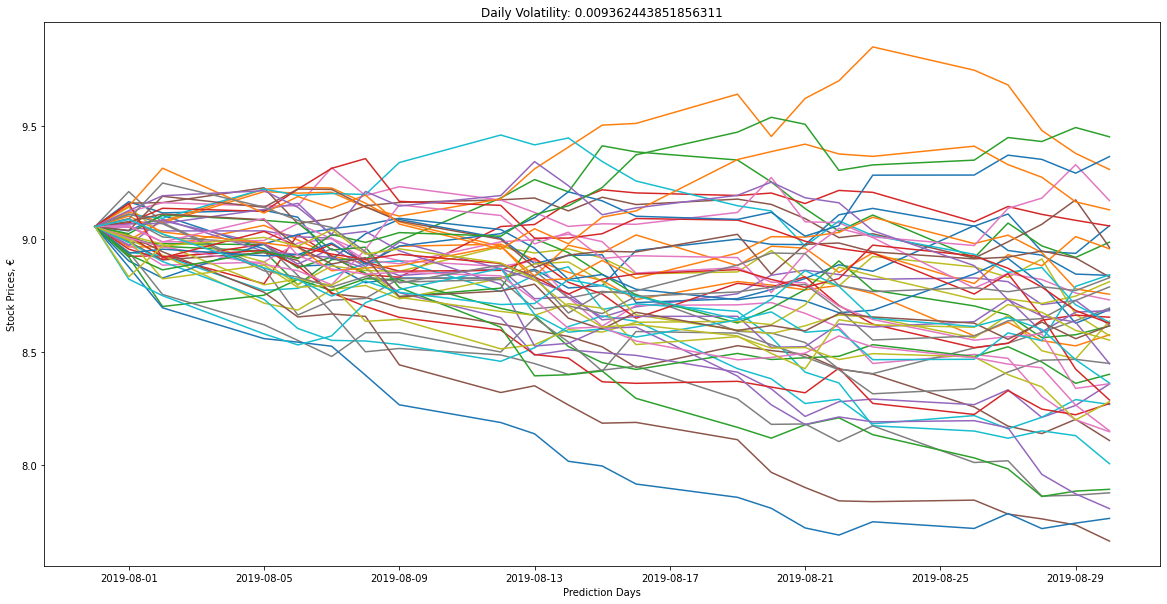

In [3]:
# Making the predictions
# Usamos la solución explícita de la integral estocástica
S = np.array([So * np.exp(drift + diffusion[str(scen)]) for scen in range(1, scen_size + 1)]) 
S = np.hstack((np.array([[So] for scen in range(scen_size)]), S)) # add So to the beginning series
# print('\n\n S---->', S)

# Plotting the simulations
plt.figure(figsize = (20,10))
for i in range(scen_size):
    plt.title("Daily Volatility: " + str(sigma))
    plt.plot(pd.date_range(start = S_eon["Date"].max(), 
                end = pred_end_date, freq = 'D').map(lambda x:
                x if x.isoweekday() in range(1, 6) else np.nan).dropna(), S[i, :])
    plt.ylabel('Stock Prices, €')
    plt.xlabel('Prediction Days')
plt.show()

# Dataframe format for predictions - first 10 scenarios only
Preds_df = pd.DataFrame(S.swapaxes(0, 1)[:, :10]).set_index(
           pd.date_range(start = S_eon["Date"].max(), 
           end = pred_end_date, freq = 'D').map(lambda x:
           x if x.isoweekday() in range(1, 6) else np.nan).dropna()
           ).reset_index(drop = False)


# CAGINALP

Ver https://zerowithdot.com/financial-independence-ode-python/

El único concepto de valor se relaciona con los precios recientes. Es decir, escribimos
\begin{equation}
    \label{fundamental value}
    P_a(t)=\frac{1}{c_3}\int_{-\infty}^te^{-(t-\tau)/c_3}P(\tau)d\tau;
\end{equation}

Ratio de transición  de dinero a activo, $k$, dado por
$$k=\frac{1}{2}\left(1+\tanh \zeta\right),$$
donde $\zeta(t)=\zeta_1(t)+\zeta_2(t)$ y
\begin{align*}
\label{investor sentiment}
    \zeta_1(t)&=\frac{q_1}{c_1}\int_{-\infty}^te^{-(t-\tau)/c_1}\frac{1}{P(\tau)}\frac{dP(\tau)}{d\tau}d\tau,\\
    \zeta_2(t)&=\frac{q_2}{c_2}\int_{-\infty}^te^{-(t-\tau)/c_2}\frac{P_a(\tau)-P(\tau)}{P_a(\tau)}d\tau;
\end{align*}

La liquidez es la suma de la liquidez del grupo de tenedores núcleo, $L_0$, y la cantidad proveniente de los especuladores que actúan sobre el trend reciente
\begin{equation}
    \label{liquidity}
    L(t)=L_0+\frac{L_0}{c}q\int_{-\infty}^te^{-(t-\tau)/c}\frac{\tau_0}{P(\tau)}\frac{dP(\tau)}{d\tau}d\tau.
\end{equation}

Escribiendo el término $k/(1-k)$ en términos de $\zeta_1,\zeta_2$ y linealizando tenemos
    $$\frac{k}{1-k}\sim 1+2\zeta_1+2\zeta_2,$$
y la ecuación del precio queda
\begin{equation}
\label{price eq}
    \frac{\tau_0}{P}\frac{dP}{dt}=(1+2\zeta_1+2\zeta_2)\frac{L}{P}-1;
\end{equation}

Derivando y juntando las ecuaciones anteriores obtenemos
\begin{equation}
        \label{sistema}
        \begin{aligned}
        \tau_0P'&=(1+2\zeta_1+2\zeta_2)L-P,\\
        c_3P_a'&=P-P_a,\\
        cL'&=1-L+q\{(1+2\zeta_1+2\zeta_2)L-P\},\\
        c_1\zeta_1'&=q_1\left((1+2\zeta_1+2\zeta_2)\frac{L}{P}-1\right)-\zeta_1,\\
        c_2\zeta_2'&=q_2\frac{P_a-P}{P_a}-\zeta_2.
    \end{aligned}
\end{equation}

Escalamos por $c=c_1=c_2=1$ para simplificar los cálculos y permitimos arbitrarios $\tau_0,c_3$ en el análisis.

In [4]:
c=c_1=c_2=1
c_3=10
tau_0=0.1
zeta_1=0
zeta_2=0
q=15

In [5]:
P,L=np.meshgrid(np.linspace(-1,1,100),np.linspace(-1,1,100))
#P,P_a,L,zeta_1,zeta_2=np.meshgrid(np.linspace(-1,1,100),np.linspace(-1,1,100),np.linspace(-1,1,100),np.linspace(-1,1,100),np.linspace(-1,1,100))

In [6]:
aux=1+2*zeta_1+2*zeta_2
dP=(aux*L-P)/tau_0
#dP_a=(P-P_a)/c_3
dL=(1-L+q*(aux*L-P))/c
#dzeta_1=(q_1*(aux*L/P-1)-zeta_1)/c_1
#dzeta_2=(q_2*(P_a-P)/P_a-zeta_2)/c_2

In [7]:
from scipy.integrate import odeint
#from mpl_toolkits.mplot3d import Axes3D
# Definimos la matriz A=f como función vectorial
def f(Y, t):
    y1, y2 = Y
    return [(aux*y2-y1)/tau_0, (1-y2+q*(aux*y2-y1))/c]

# Definimos la grilla definiendo tiras y1 e y2 y combinandolas como una tira en R2 usando meshgrid.
y1 = np.linspace(-8.0, 8.0, 20)
y2 = np.linspace(-4.0, 4.0, 20)

Y1, Y2 = np.meshgrid(y1, y2)

t = 0

u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)

NI, NJ = Y1.shape

# Armamos los vectores u,v como las imágenes de A=f para cada par (Y1,Y2)
for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        yprime = f([x, y], t)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]

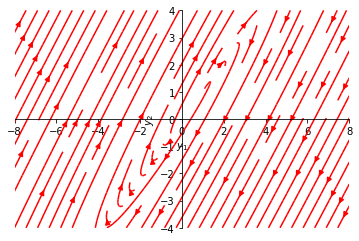

In [8]:
###################################################
#centramos los ejes
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

#spine placement data centered

ax.spines['left'].set_position(('data', 0.0))
ax.spines['bottom'].set_position(('data', 0.0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
###################################################
Q1 = plt.streamplot(Y1, Y2, u, v, color='r')

plt.xlabel('$y_1$')
plt.ylabel('$y_2$')
plt.xlim([-8, 8])
plt.ylim([-4, 4])

#plt.savefig('Diagrama de fases as plt.streamplot.png')

#plt.clf()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint


class Life:
    def __init__(self):
        self.income = 10000  # gold pcs. per month
        self.spending = 5000 # gold pcs. per month
        self.tax_rate = 0.19 # example
    
    def earn(self, t):
        return 12 * self.income

    def spend(self, t):
        return 12 * self.spending

    def pay_taxes(self, t):
        return self.earn(t) * self.tax_rate


def live_without_investing(x, t, you):
    return you.earn(t) - you.spend(t) - you.pay_taxes(t)

def simulate(you):
    t = np.linspace(0, 100, num=101)
    x = odeint(live_without_investing, 0, t, args=(you,))
    return pd.DataFrame({'time': t, 'wallet (non-investor)': x})


you = Life()
df = simulate(you)

In [ ]:
class Life:
    def __init__(self):
        self.income = 10000  # gold pcs. per month
        self.spending = 5000 # gold pcs. per month
        self.tax_rate = 0.19 # example
        self.investment_fraction = 0.75  # beta
        self.interest_rate = 5  # 5%
        self.pay_raise = 100
        self.life_inflation = 50
        self.pension = 1000
        self.starting_age = 18
        self.retirement_age = 67
        self.costs = 650
    
    def earn(self, t):
        if t < self.starting_age:
            return 0
        elif self.starting_age <= t < self.retirement_age:
            return 12 * (self.income + self.pay_raise \
                      * (t - self.starting_age))
        else:
            return 12 * self.pension

    def spend(self, t):
        return 12 * (self.costs + self.life_inflation \
                  * (t - self.starting_age))

    def pay_taxes(self, t):
        return self.earn(t) * self.tax_rate


def live_with_investing(x, t, you):
    balance = you.earn(t) - you.spend(t) - you.pay_taxes(t)
    if t < self.retirement_age:
        x1 = balance * (1 - you.investment_fraction)
        x2 = np.log(1 + 0.01 * you.interest_rate) * x[1] \
           + balance * you.investment_fraction
    else:
        x1 = balance
        x2 = 0
    return [x1, x2]
def simulate(you):
    t0 = np.linspace(0, you.starting_age - 1, num=you.starting_age)
    t1 = np.linspace(you.starting_age, you.retirement_age - 1, num=(you.retirement_age - you.starting_age))
    t2 = np.linspace(you.retirement_age, 100, num=(100 - you.retirement_age))

    # non-investor
    x1_0 = np.zeros((t0.shape[0], 1))
    x1_1 = odeint(live_without_investing, 0, t1, args=(you,))
    x1_2 = odeint(live_without_investing, x1_1[-1], t2, args=(you,))

    # investor
    x2_0 = np.zeros((t0.shape[0], 2))
    x2_1 = odeint(live_with_investing, [0, 0], t1, args=(you,))
    x2_2 = odeint(live_with_investing, [x2_1[-1].sum(), 0], t2, args=(you,))

    df0 = pd.DataFrame({'time': t0, 'wallet (non-investor)': x1_0[:, 0], 'wallet (investor)': x2_0[:, 0], 'investment bucket (investor)': x2_0[:, 1]})
    df1 = pd.DataFrame({'time': t1, 'wallet (non-investor)': x1_1[:, 0], 'wallet (investor)': x2_1[:, 0], 'investment bucket (investor)': x2_1[:, 1]})
    df2 = pd.DataFrame({'time': t2, 'wallet (non-investor)': x1_2[:, 0], 'wallet (investor)': x2_2[:, 0], 'investment bucket (investor)': x2_2[:, 1]})
    return pd.concat([df0, df1, df2])
you = Life()
df = simulate(you)